# Clustering


In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# DATA PREPARATION

In [2]:
from data_prep import DataPrep

In [3]:
df = DataPrep()

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0.0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0.0,0,0
2,0.0,1.0,0.0,1.0,1.0,1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0.0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0.0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0.0,1,0


In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
# Changing visitor type into int
df['VisitorType'] = df['VisitorType'].dropna().astype(int)

In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0.0,1.0,0.0,1.0,1.0,1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,0


C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


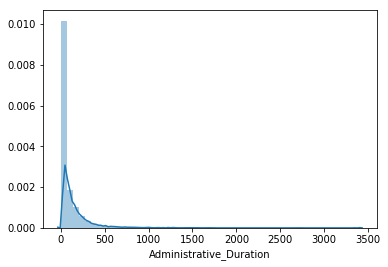

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


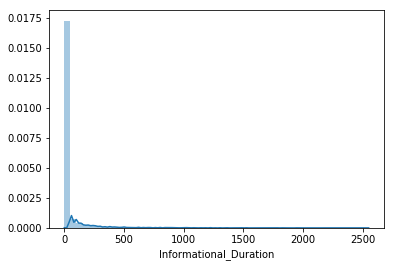

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


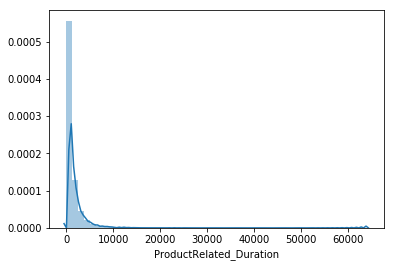

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Administrative_Duration
administrative_Duration_dist = sns.distplot(df['Administrative_Duration'].dropna())
plt.show()

# Distribution of Informational_Duration
informational_Duration_dist = sns.distplot(df['Informational_Duration'].dropna())
plt.show()

# Distribution of ProductRelated_Duration
productRelated_Duration_dist = sns.distplot(df['ProductRelated_Duration'].dropna())
plt.show()


The above distribution plot shows that maximum of the records are close to zero. As the duration should have records that are greater than 0. This shows show data problem.

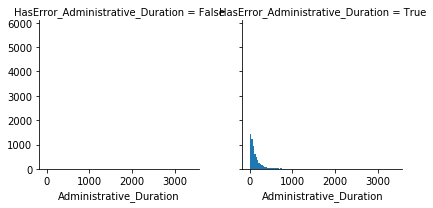

In [9]:

# create a mask of errorneous Administrative_Duration values
df['HasError_Administrative_Duration'] = df['Administrative_Duration'] > 0

# use FaceTGrid to plot the distribution of Administrative_Duration when Administrative_Duration is errorneous
g = sns.FacetGrid(df, col='HasError_Administrative_Duration')
g = g.map(plt.hist, 'Administrative_Duration', bins=100)

plt.show()

FacetGrid shows that errorneous data in Administrative_Duration are correlated with errorneous data in Administrative_Duration. Based on this insight, we should eliminate all rows with errorneous Administrative_Duration.

In [10]:
# before
print("Row # before dropping errorneous rows", len(df))

# a very easy way to drop rows with Administrative_Duration values below 0
df = df[df['Administrative_Duration'] > 0]

# after
print("Row # after dropping errorneous rows", len(df))

Row # before dropping errorneous rows 12231
Row # after dropping errorneous rows 6426


C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


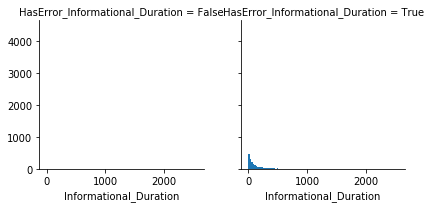

In [11]:
# create a mask of errorneous Informational_Duration values
df['HasError_Informational_Duration'] = df['Informational_Duration'] > 0

# use FaceTGrid to plot the distribution of Informational_Duration when Informational_Duration is errorneous
g = sns.FacetGrid(df, col='HasError_Informational_Duration')
g = g.map(plt.hist, 'Informational_Duration', bins=100)

plt.show()

FacetGrid shows that there is errorneous data in Informational_Duration, so we will remove the errorneous data.

In [12]:
# before
print("Row # before dropping errorneous rows", len(df))

# a very easy way to drop rows with Informational_Duration values below 0
df = df[df['Informational_Duration'] > 0]

# after
print("Row # after dropping errorneous rows", len(df))

Row # before dropping errorneous rows 6426
Row # after dropping errorneous rows 2011


C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


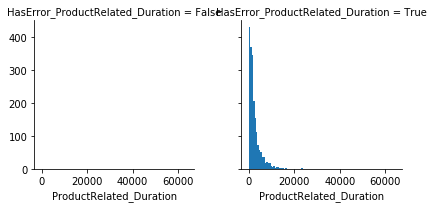

In [13]:
# create a mask of errorneous ProductRelated_Duration values
df['HasError_ProductRelated_Duration'] = df['ProductRelated_Duration'] > 0

# use FaceTGrid to plot the distribution of ProductRelated_Duration when ProductRelated_Duration is errorneous
g = sns.FacetGrid(df, col='HasError_ProductRelated_Duration')
g = g.map(plt.hist, 'ProductRelated_Duration', bins=100)

plt.show()

FacetGrid shows that there is no errorneous data in ProductRelated_Duration.

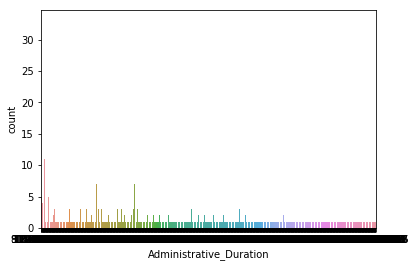

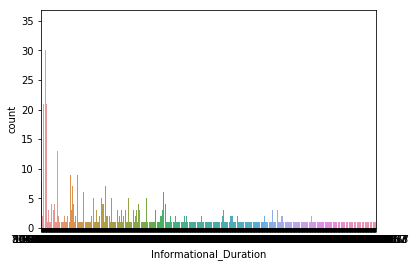

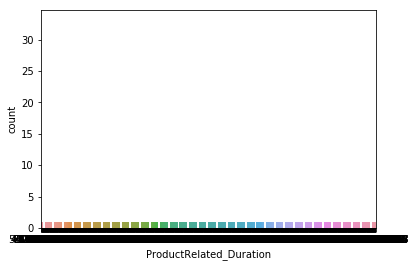

In [14]:
dg = sns.countplot(data=df, x='Administrative_Duration')
plt.show()

dg = sns.countplot(data=df, x='Informational_Duration')
plt.show()

dg = sns.countplot(data=df, x='ProductRelated_Duration')
plt.show()

# DATA PREPARATION - END

# Clustering without standardization 

In [15]:
df2 = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']] 

# converting df to matrix
X = df2.as_matrix()

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [16]:
#Importing Libraries 
from sklearn.cluster import KMeans

# random state, we will use 10
rs = 10



In [17]:
# set the random state
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 6253495534.464718
Centroid locations:
[ 278.11246426  279.41106678 7441.05345742]
[ 186.35640192  158.28294254 1554.9338952 ]
[ 1558.19630558  1034.0325     30277.952413  ]


Cluster membership
1    1690
0     311
2      10
Name: Cluster_ID, dtype: int64


C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


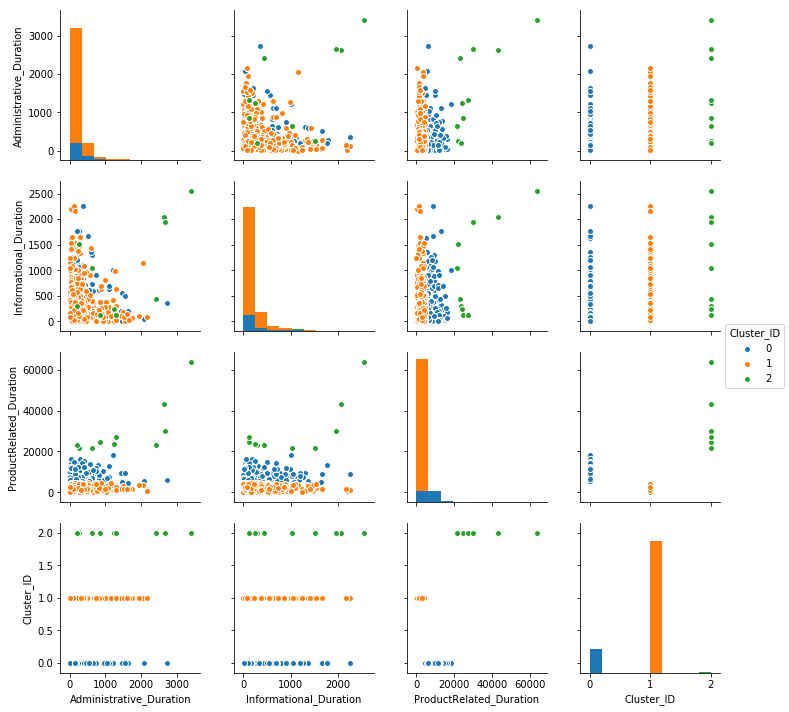

In [18]:
model = KMeans(n_clusters=3, random_state=rs).fit(X)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df2['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

# Clustering with standardization

In [19]:
#Importing Libraries 
from sklearn.preprocessing import StandardScaler

df3 = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']] 

# converting df to matrix
X_ = df3.as_matrix()

# scaling
scaler = StandardScaler()

X_ = scaler.fit_transform(X_)

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [20]:
#Importing Libraries 
from sklearn.cluster import KMeans

# random state, we will use 10
rs = 10

# set the random state
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X_)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 3430.406118751508
Centroid locations:
[-0.1766307  -0.24209235 -0.11305646]
[0.02098977 2.74282584 0.65820497]
[3.62505076 0.45563329 1.24817797]


Cluster membership
0    1782
1     143
2      86
Name: Cluster_ID, dtype: int64


C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


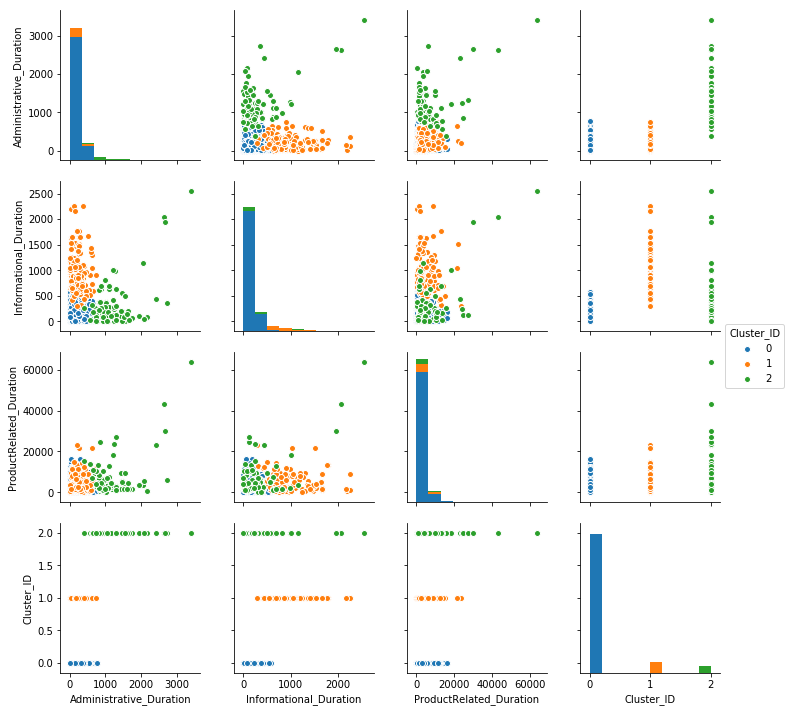

In [21]:
model = KMeans(n_clusters=3, random_state=rs).fit(X_)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X_)
df3['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df3['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df3, hue='Cluster_ID')
plt.show()

### Cluster Analysis

Distribution for cluster 0


C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


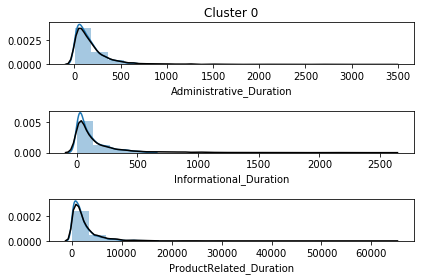

Distribution for cluster 1


C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


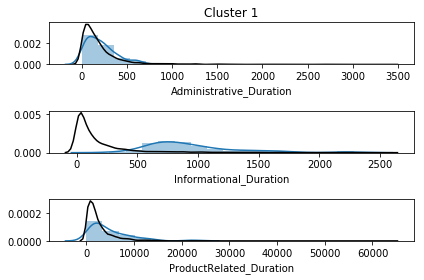

In [22]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
n_bins = 20

# inspecting cluster 0 and 1
clusters_to_inspect = [0,1]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=3)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df3[col]), max(df3[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df3[df3['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df3[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.show()

In [23]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X_)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

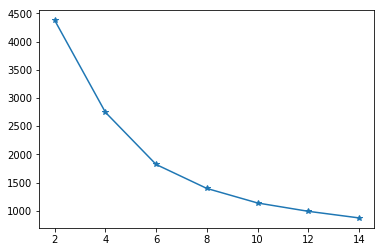

In [24]:
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

Since the elbow method shows that clusters between 4 and 6 are better. silhouette_score will be used to determine the number of cluster

In [25]:

from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X_, clusters[1].predict(X_)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X_, clusters[2].predict(X_)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=4 0.596227463195766
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=6 0.4115597428269737


silhouette_score for cluster 4 is higher. so we will be using cluster number as 4

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Cluster membership
1    1734
3     137
2     137
0       3
Name: Cluster_ID, dtype: int64


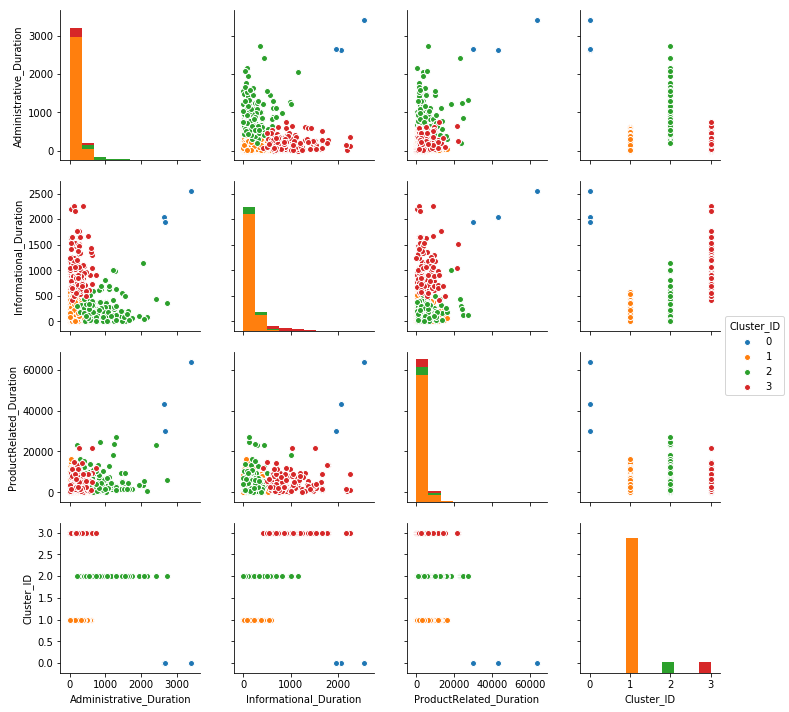

In [26]:
model = KMeans(n_clusters=4, random_state=rs).fit(X_)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X_)
df3['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df3['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df3, hue='Cluster_ID')
plt.show()

# Clustering model with extra information

In [27]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,HasError_Administrative_Duration,HasError_Informational_Duration,HasError_ProductRelated_Duration
2,0.0,1.0,0.0,1.0,1.0,1.0,0.2,0.2,0.0,0.0,...,4,1,9,3,0,0,0,True,True,True
6,0.0,1.0,0.0,1.0,1.0,1.0,0.2,0.2,0.0,0.4,...,2,4,3,3,0,0,0,True,True,True
7,1.0,1.0,0.0,1.0,1.0,1.0,0.2,0.2,0.0,0.0,...,1,2,1,5,0,1,0,True,True,True
16,0.0,1.0,0.0,1.0,1.0,1.0,0.2,0.2,0.0,0.0,...,1,1,4,3,0,0,0,True,True,True
21,0.0,1.0,0.0,1.0,1.0,1.0,0.2,0.2,0.0,0.0,...,3,3,1,3,0,0,0,True,True,True


### Clustering with the extra information

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


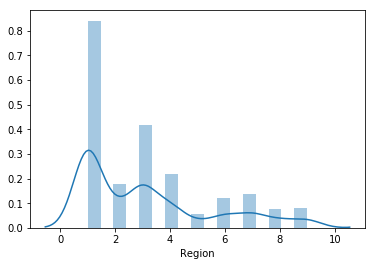

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


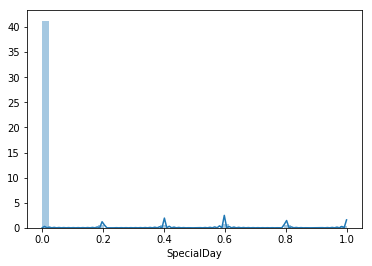

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Region
ProductRelated_dist = sns.distplot(df['Region'].dropna())
plt.show()

# Distribution of SpecialDay
SpecialDayl_dist = sns.distplot(df['SpecialDay'].dropna())
plt.show()


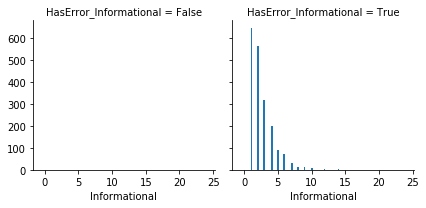

In [29]:
# create a mask of errorneous Informational_Duration values
df['HasError_Informational'] = df['Informational'] > 0

# use FaceTGrid to plot the distribution of Informational_Duration when Informational_Duration is errorneous
g = sns.FacetGrid(df, col='HasError_Informational')
g = g.map(plt.hist, 'Informational', bins=100)

plt.show()

In [30]:
# before
print("Row # before dropping errorneous rows", len(df))

# a very easy way to drop rows with Informational values below 0
df = df[df['Informational'] > 0]

# after
print("Row # after dropping errorneous rows", len(df))

Row # before dropping errorneous rows 2011
Row # after dropping errorneous rows 1978


In [31]:
dfe = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'SpecialDay', 'Weekend', 'Month', 'Region']]

# converting df to matrix
X_2 = dfe.as_matrix()

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Kprototypes -> need the categorical variable to be object type

In [32]:
df['Weekend'] = df['Weekend'].astype(object)

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
df['Month'] = df['Month'].astype(object)

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 57 to 12313
Data columns (total 22 columns):
Administrative                      1978 non-null float64
Administrative_Duration             1978 non-null float64
Informational                       1978 non-null float64
Informational_Duration              1978 non-null float64
ProductRelated                      1978 non-null float64
ProductRelated_Duration             1978 non-null float64
BounceRates                         1978 non-null float64
ExitRates                           1978 non-null float64
PageValues                          1978 non-null float64
SpecialDay                          1978 non-null float64
Month                               1978 non-null object
OperatingSystems                    1978 non-null int64
Browser                             1978 non-null int64
Region                              1978 non-null int64
TrafficType                         1978 non-null int64
VisitorType                   

### Clustering model without standardization

In [35]:
# Kprototypes should be used instead of Kmeans to include both numeric and categorical variables in clustering
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
test=KPrototypes(n_clusters=3, init='Huang') # n_cluster is the parameter to set the number of clusters.
y=test.fit_predict(X_2, categorical=[2]) # Here categorical should be set with the indices of categorical variables. In this dataset, workclass is the only categorical variable. Note: Index starts with 0.  
dfe['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(dfe['Cluster_ID'].value_counts())

Cluster membership
0    1741
1     148
2      89
Name: Cluster_ID, dtype: int64


C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


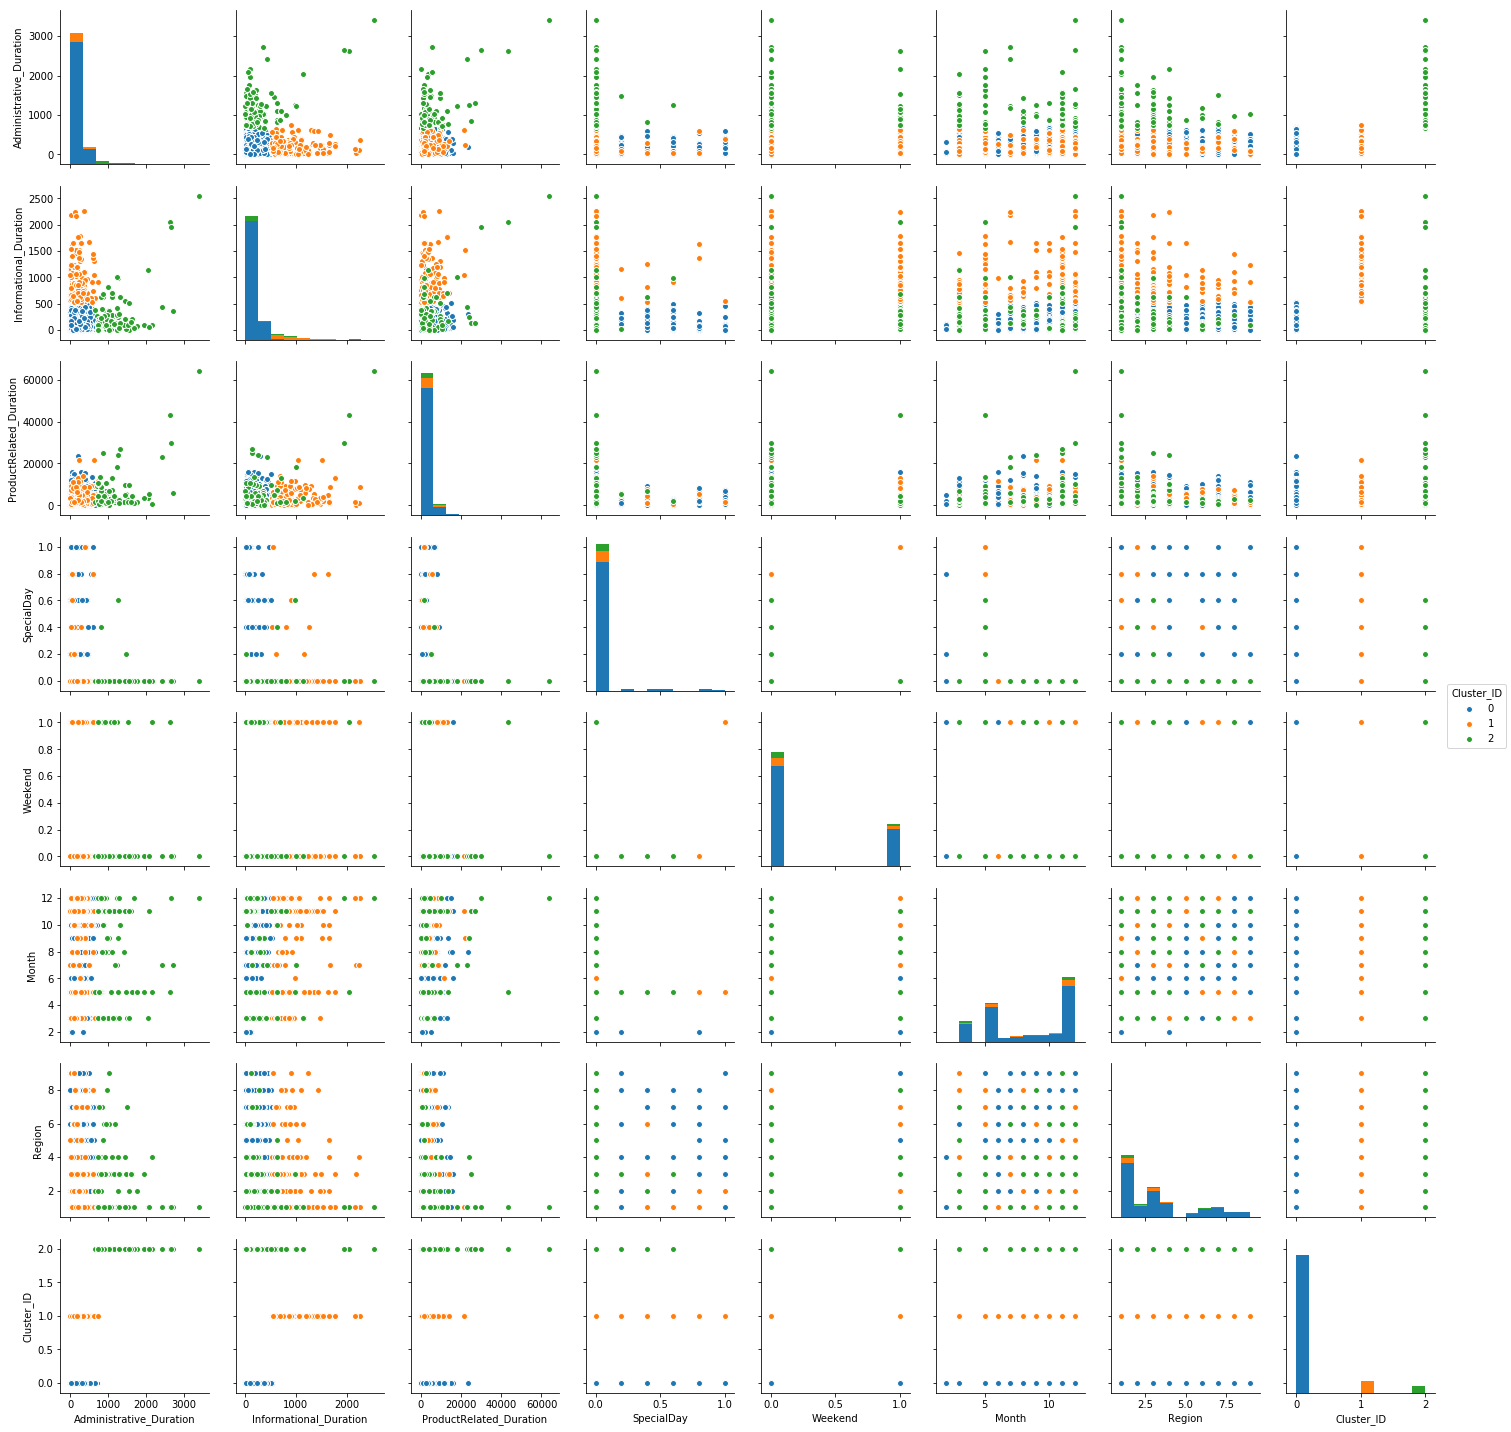

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
# pairplot the cluster distribution.
cluster_g = sns.pairplot(dfe, hue='Cluster_ID')
plt.show()

### Clustering with standardization

In [37]:
#Importing Libraries 
from sklearn.preprocessing import StandardScaler

dfe_2 = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'SpecialDay', 'Weekend', 'Month', 'Region']]

# converting df to matrix
X_3 = dfe_2.as_matrix()

# scaling
scaler = StandardScaler()

X_3 = scaler.fit_transform(X_3)

C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
# Kprototypes should be used instead of Kmeans to include both numeric and categorical variables in clustering
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
test=KPrototypes(n_clusters=3, init='Huang') # n_cluster is the parameter to set the number of clusters.
y=test.fit_predict(X_3, categorical=[2]) # Here categorical should be set with the indices of categorical variables. In this dataset, workclass is the only categorical variable. Note: Index starts with 0.  
dfe_2['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(dfe_2['Cluster_ID'].value_counts())

Cluster membership
0    1087
2     793
1      98
Name: Cluster_ID, dtype: int64


C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


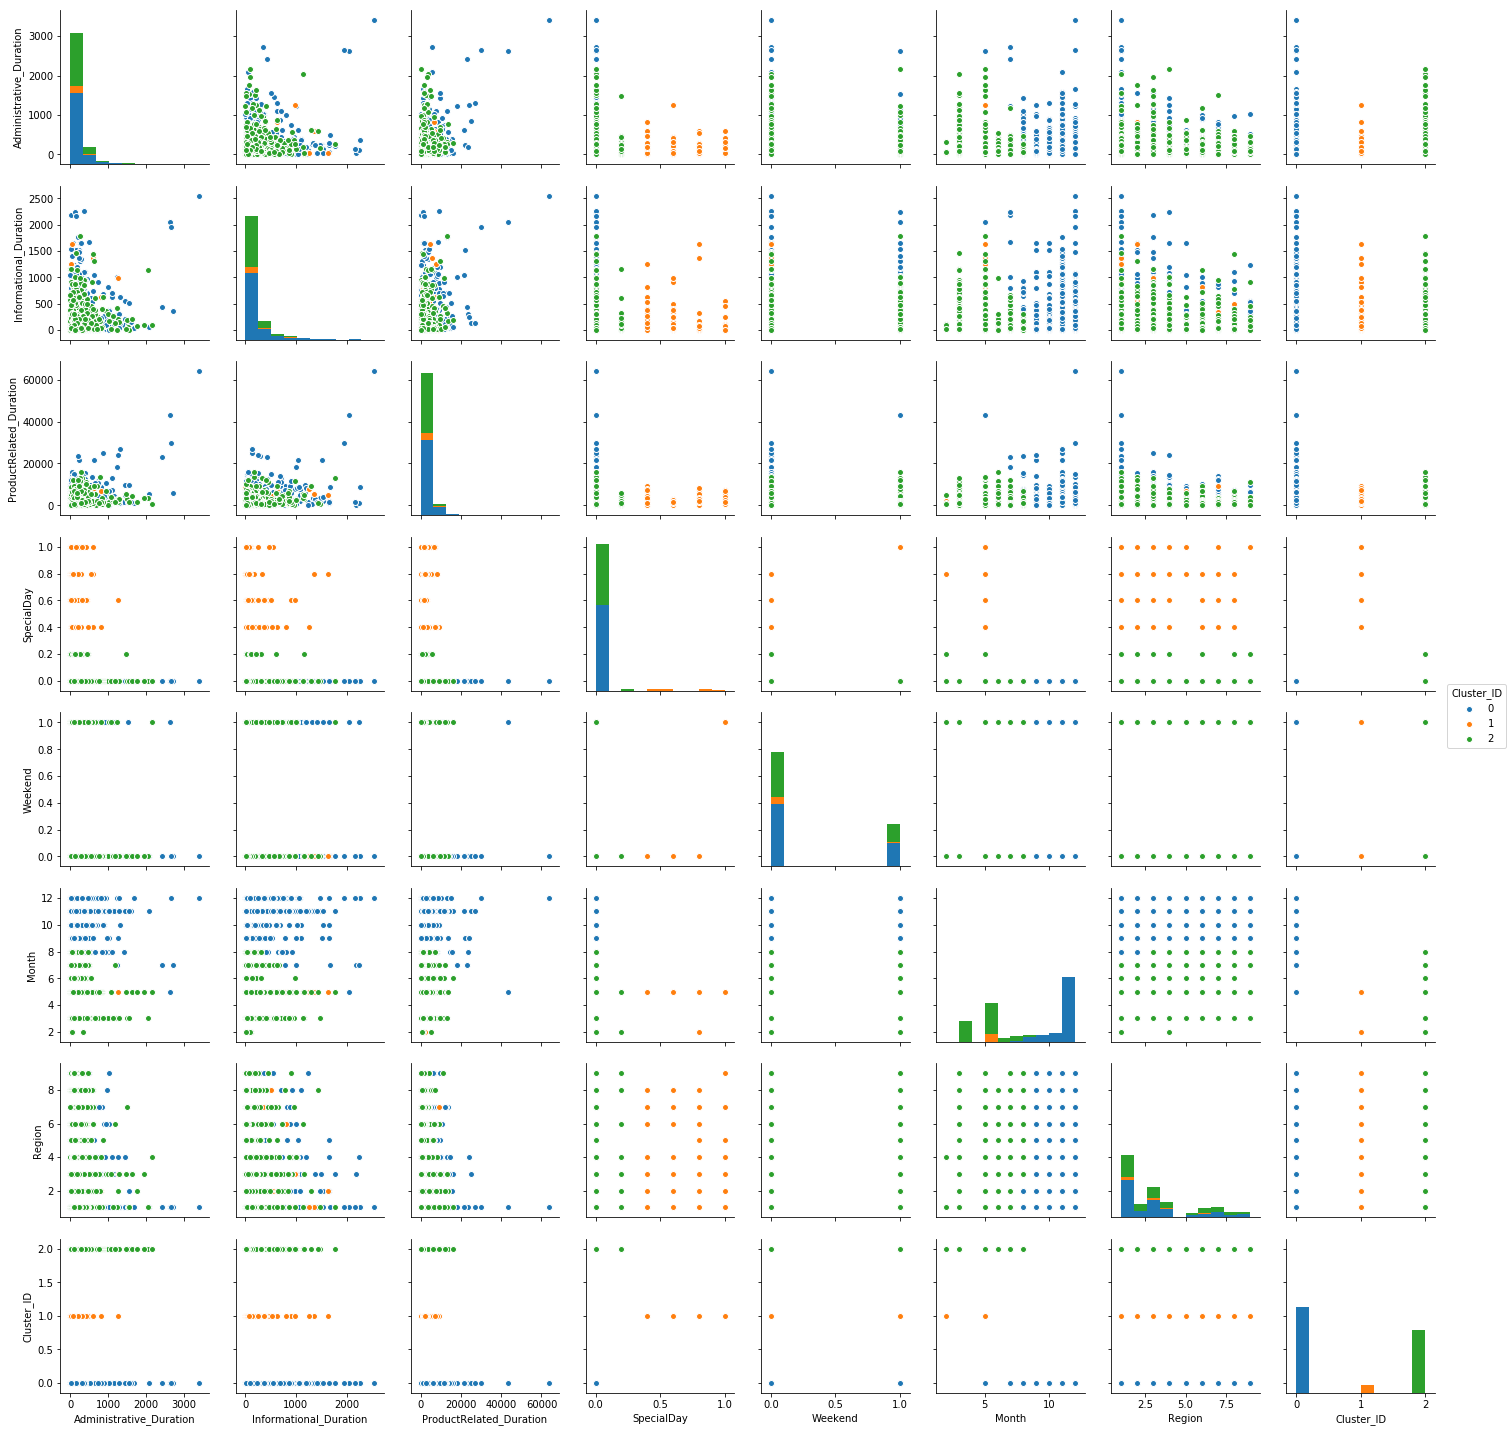

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
# pairplot the cluster distribution.
cluster_g = sns.pairplot(dfe_2, hue='Cluster_ID')
plt.show()

In [41]:
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X_3)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

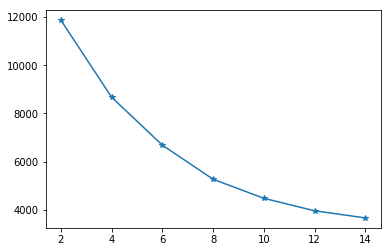

In [42]:
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

In [43]:
from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X_3, clusters[1].predict(X_3)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X_3, clusters[2].predict(X_3)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=4 0.27567957318962194
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=6 0.2699343890463896


The Silhouette score for cluster 4 and 6, indicates that the cluster 4 s far better than that cluster 6 so we will be using cluster number as 4. 

In [44]:
# Kprototypes should be used instead of Kmeans to include both numeric and categorical variables in clustering
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
test=KPrototypes(n_clusters=4, init='Huang') # n_cluster is the parameter to set the number of clusters.
y=test.fit_predict(X_3, categorical=[2]) # Here categorical should be set with the indices of categorical variables. In this dataset, workclass is the only categorical variable. Note: Index starts with 0.  
dfe_2['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(dfe_2['Cluster_ID'].value_counts())

Cluster membership
1    789
2    571
3    520
0     98
Name: Cluster_ID, dtype: int64


C:\Users\Rakesh Maharjan\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


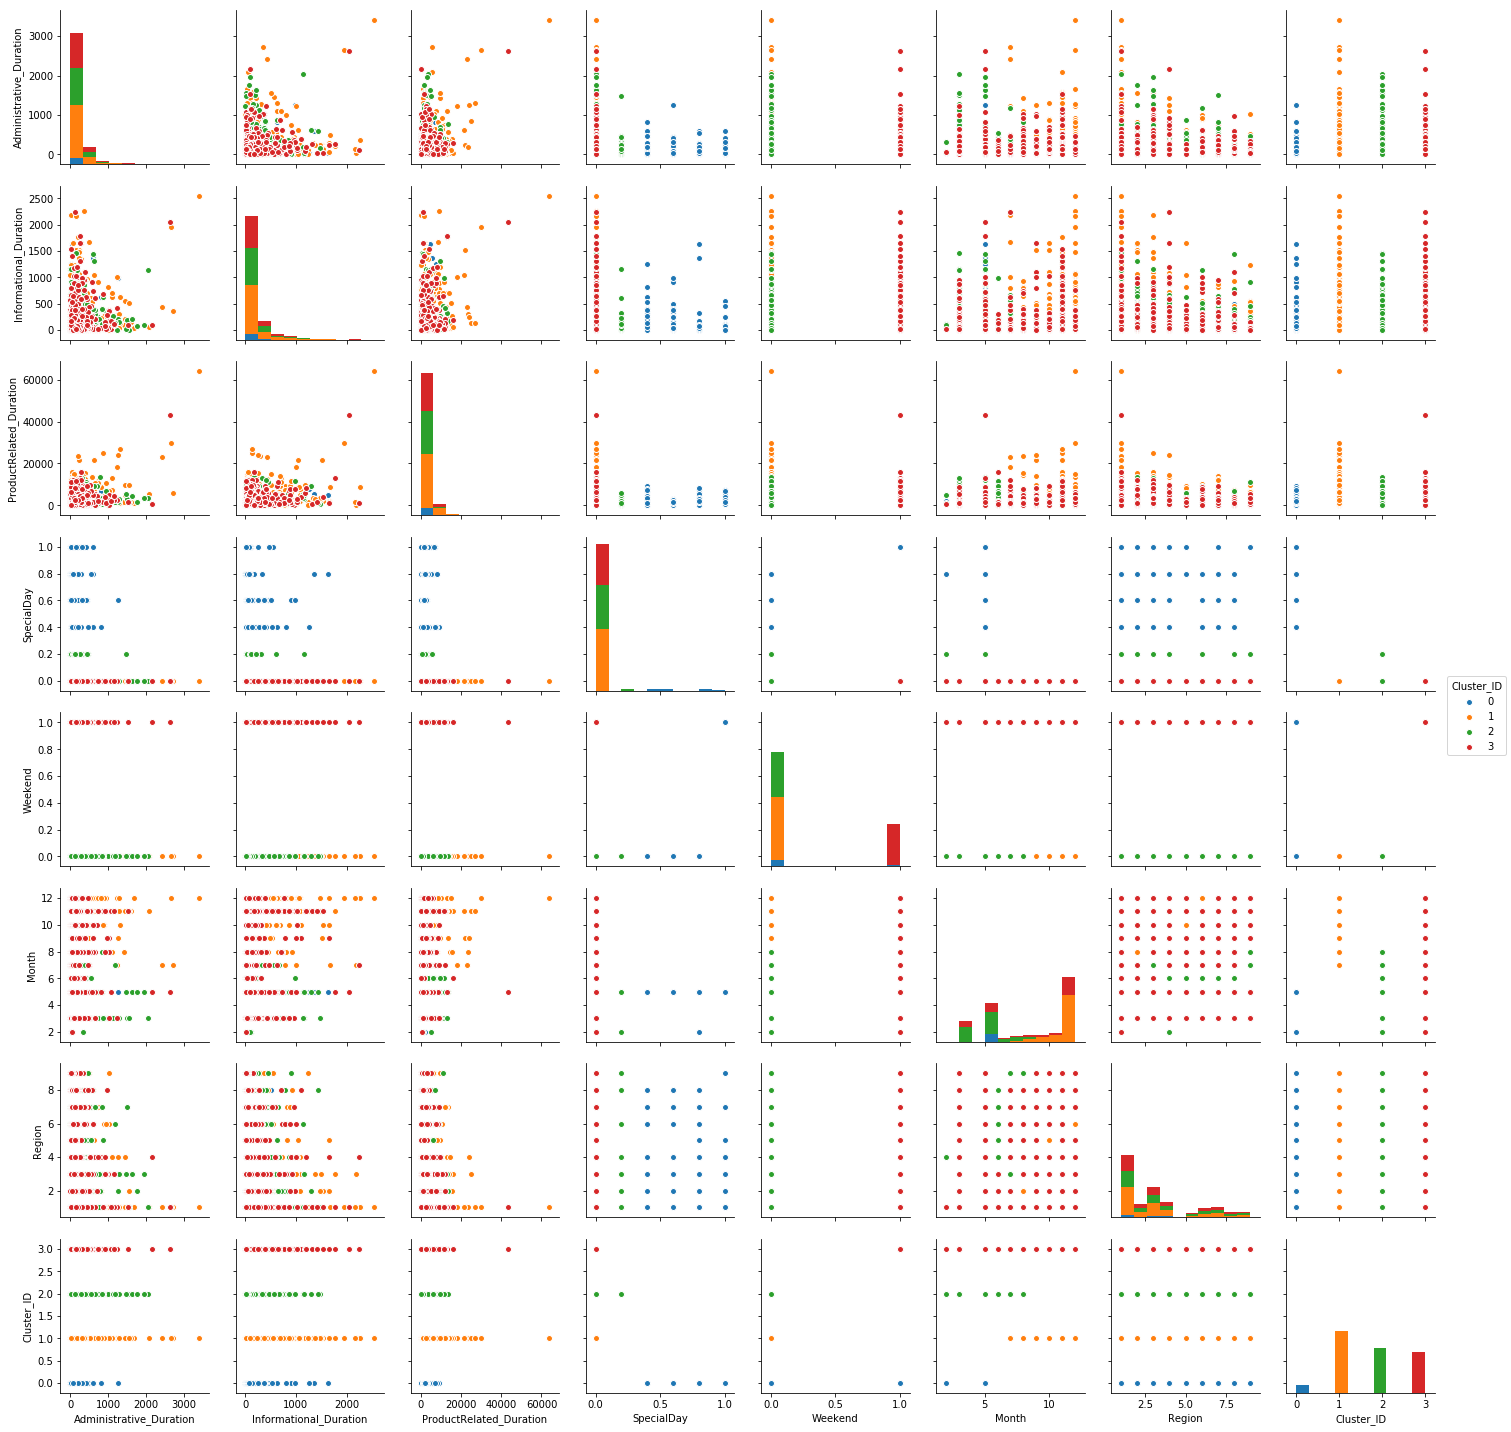

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
# pairplot the cluster distribution.
cluster_g = sns.pairplot(dfe_2, hue='Cluster_ID')
plt.show()

# Association Mining the Online Retail Data

Data preparation

In [1]:
import pandas as pd
import numpy as np

# load the dataset
df = pd.read_csv('online retail.csv',encoding = "ISO-8859-1", na_filter=False)
#online_retail.csv has string that has a non ascii character encoded it
# encoding = "ISO-8859-1"  ----- set file_encoding to the file encoding (utf8, latin1, etc.)


df.info()
print(df.head(10))

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
InvoiceNo      532619 non-null object
StockCode      532619 non-null object
Description    532619 non-null object
Quantity       532619 non-null int64
InvoiceDate    532619 non-null object
UnitPrice      532619 non-null float64
CustomerID     532619 non-null object
Country        532619 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 32.5+ MB
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     217

In [2]:
#Drop unused data 
df.drop(['InvoiceDate'], axis=1,       inplace=True)

In [3]:
#replace empty value with nan
df = df.replace('', np.nan)
df = df.dropna(how='any')

In [4]:
# chnaging all letters to uppercase
df['StockCode'] = df['StockCode'].str.upper()

In [5]:
#Changing InvoiceNo to int
df['InvoiceNo'] = df['InvoiceNo'].astype(int)

Performing associating mining

group 1 CustomerID and StockCode

In [6]:
# group CustomerID, and then generate list of all items purchased
transactions = df.groupby(['CustomerID'])['StockCode'].apply(list)

print(transactions.head(10))

CustomerID
12346                                              [23166]
12347    [85116, 22375, 71477, 22492, 22771, 22772, 227...
12348    [84992, 22951, 84991, 84991, 21213, 21213, 226...
12349    [23112, 23460, 21564, 21411, 21563, 22131, 221...
12350    [21908, 22412, 79066K, 79191C, 22348, 84086C, ...
12352    [21380, 22064, 21232, 22646, 22779, 22423, 226...
12353                         [37449, 37446, 22890, 37450]
12354    [23201, 23204, 23205, 23254, 23255, 23256, 219...
12355    [22693, 23076, 23077, 22890, 22649, 22423, 850...
12356    [22138, 21198, 21114, 21199, 21231, 22060, 220...
Name: StockCode, dtype: object


In [7]:
#require install pip install apyori

from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.05))

# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'20685'}), support=0.07582392256280249, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20685'}), confidence=0.07582392256280249, lift=1.0)]), RelationRecord(items=frozenset({'20712'}), support=0.05715602673427057, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20712'}), confidence=0.05715602673427057, lift=1.0)]), RelationRecord(items=frozenset({'20718'}), support=0.05439041253745103, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20718'}), confidence=0.05439041253745103, lift=1.0)]), RelationRecord(items=frozenset({'20719'}), support=0.05485134823692095, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20719'}), confidence=0.05485134823692095, lift=1.0)]), RelationRecord(items=frozenset({'20723'}), support=0.053007605439041254, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'207

In [8]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

print(result_df.head(20))

   Left_side Right_side   Support  Confidence  Lift
0                 20685  0.075824    0.075824   1.0
1                 20712  0.057156    0.057156   1.0
2                 20718  0.054390    0.054390   1.0
3                 20719  0.054851    0.054851   1.0
4                 20723  0.053008    0.053008   1.0
5                 20724  0.077207    0.077207   1.0
6                 20725  0.122609    0.122609   1.0
7                 20726  0.085734    0.085734   1.0
8                 20727  0.105554    0.105554   1.0
9                 20728  0.110394    0.110394   1.0
10                20749  0.055082    0.055082   1.0
11                20750  0.054160    0.054160   1.0
12                20914  0.082047    0.082047   1.0
13                20971  0.063840    0.063840   1.0
14                20972  0.071906    0.071906   1.0
15                20975  0.053238    0.053238   1.0
16                21034  0.110625    0.110625   1.0
17                21080  0.098410    0.098410   1.0
18          

In [9]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(30))

             Left_side Right_side   Support  Confidence       Lift
484  22697,22423,22699      22698  0.051625    0.864865  11.763789
471        22697,22423      22698  0.056465    0.824916  11.220407
481        22697,22699      22698  0.060152    0.813084  11.059473
485  22698,22423,22699      22697  0.051625    0.961373  10.778809
482        22698,22699      22697  0.060152    0.959559  10.758464
472        22698,22423      22697  0.056465    0.945946  10.605838
387              22629      22630  0.051625    0.695652  10.517194
388              22630      22629  0.051625    0.780488  10.517194
391              22697      22698  0.068218    0.764858  10.403506
392              22698      22697  0.068218    0.927900  10.403506
478        22423,22699      22698  0.053699    0.725857   9.873016
385              22577      22578  0.057847    0.731778   9.563815
386              22578      22577  0.057847    0.756024   9.563815
483  22698,22697,22423      22699  0.051625    0.914286   9.37

In [10]:
# sort all acquired rules descending by Confidence
result_df = result_df.sort_values(by='Confidence', ascending=False)
print(result_df.head(30))

             Left_side Right_side   Support  Confidence       Lift
485  22698,22423,22699      22697  0.051625    0.961373  10.778809
482        22698,22699      22697  0.060152    0.959559  10.758464
472        22698,22423      22697  0.056465    0.945946  10.605838
392              22698      22697  0.068218    0.927900  10.403506
483  22698,22697,22423      22699  0.051625    0.914286   9.378453
411              22804     85123A  0.052777    0.908730   4.606285
477        22698,22423      22699  0.053699    0.899614   9.227954
480        22698,22697      22699  0.060152    0.881757   9.044781
474        22697,22423      22699  0.059691    0.872054   8.945252
484  22697,22423,22699      22698  0.051625    0.864865  11.763789
486  22698,22697,22699      22423  0.051625    0.858238   4.226893
479        22698,22699      22423  0.053699    0.856618   4.218915
395              22698      22699  0.062687    0.852665   8.746363
393              22697      22699  0.073980    0.829457   8.50

In [11]:
# sort all acquired rules descending by support
result_df = result_df.sort_values(by='Support', ascending=False)
print(result_df.head(20))

    Left_side Right_side   Support  Confidence  Lift
95                 22423  0.203042    0.203042   1.0
262               85123A  0.197280    0.197280   1.0
227                47566  0.163171    0.163171   1.0
249                84879  0.156257    0.156257   1.0
142                22720  0.147499    0.147499   1.0
26                 21212  0.146347    0.146347   1.0
259               85099B  0.146347    0.146347   1.0
64                 22086  0.141277    0.141277   1.0
99                 22457  0.135285    0.135285   1.0
70                 22138  0.133902    0.133902   1.0
166                22960  0.132058    0.132058   1.0
203                23298  0.132058    0.132058   1.0
101                22469  0.132058    0.132058   1.0
167                22961  0.123761    0.123761   1.0
6                  20725  0.122609    0.122609   1.0
188                23203  0.116386    0.116386   1.0
87                 22382  0.112929    0.112929   1.0
71                 22139  0.112468    0.112468

group 2 InvoiceNo and StockCode

In [12]:
# group InvoiceNo, and then generate list of all items purchased in thsi single transaction
transactions = df.groupby(['InvoiceNo'])['StockCode'].apply(list)

print(transactions.head(10))

InvoiceNo
536365    [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                       [22633, 22632]
536367    [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                         [22960, 22913, 22912, 22914]
536369                                              [21756]
536370    [22728, 22727, 22726, 21724, 21883, 10002, 217...
536371                                              [22086]
536372                                       [22632, 22633]
536373    [85123A, 71053, 84406B, 20679, 37370, 21871, 2...
536374                                              [21258]
Name: StockCode, dtype: object


In [13]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
# the min_support is 0.005
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.005))

# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'10133'}), support=0.006581786793267156, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'10133'}), confidence=0.006581786793267156, lift=1.0)]), RelationRecord(items=frozenset({'10135'}), support=0.0063120414328873544, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'10135'}), confidence=0.0063120414328873544, lift=1.0)]), RelationRecord(items=frozenset({'15036'}), support=0.017479499352611134, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'15036'}), confidence=0.017479499352611134, lift=1.0)]), RelationRecord(items=frozenset({'15056BL'}), support=0.015699179974104447, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'15056BL'}), confidence=0.015699179974104447, lift=1.0)]), RelationRecord(items=frozenset({'15056N'}), support=0.02039274924471299, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=f

In [14]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

print(result_df.head(20))

   Left_side Right_side   Support  Confidence  Lift
0                 10133  0.006582    0.006582   1.0
1                 10135  0.006312    0.006312   1.0
2                 15036  0.017479    0.017479   1.0
3               15056BL  0.015699    0.015699   1.0
4                15056N  0.020393    0.020393   1.0
5                15056P  0.007283    0.007283   1.0
6                15060B  0.005125    0.005125   1.0
7                16156S  0.009009    0.009009   1.0
8                16161P  0.013379    0.013379   1.0
9                16161U  0.007229    0.007229   1.0
10               16169E  0.008038    0.008038   1.0
11                16237  0.008740    0.008740   1.0
12                17003  0.011114    0.011114   1.0
13                20668  0.009765    0.009765   1.0
14                20674  0.008038    0.008038   1.0
15                20675  0.012031    0.012031   1.0
16                20676  0.016077    0.016077   1.0
17                20677  0.011869    0.011869   1.0
18          

In [15]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(20))

                          Left_side Right_side   Support  Confidence  \
7718                    23290,23291      23289  0.005179    0.969697   
7723                    23292,23289      23291  0.005017    0.958763   
7724                    23291,23292      23289  0.005017    0.853211   
4628                          23289      23291  0.006312    0.829787   
4629                          23291      23289  0.006312    0.812500   
7716                    23290,23289      23291  0.005179    0.813559   
9475  22916,22920,22919,22917,22918      22921  0.007121    0.916667   
7720                    23292,23289      23290  0.005017    0.958763   
9450        22919,22916,22918,22917      22921  0.007553    0.909091   
9465        22919,22916,22918,22920      22921  0.007229    0.905405   
4738                          23345      23346  0.005395    0.751880   
4739                          23346      23345  0.005395    0.724638   
9455        22916,22918,22920,22917      22921  0.007391    0.90

In [16]:
#get output when right_side = 22921
result_is_22921 = result_df[result_df.Right_side == '22921']

In [17]:
result_is_22921.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 9475 to 764
Data columns (total 5 columns):
Left_side     32 non-null object
Right_side    32 non-null object
Support       32 non-null float64
Confidence    32 non-null float64
Lift          32 non-null float64
dtypes: float64(3), object(2)
memory usage: 1.5+ KB


In [18]:
result_is_22921 = result_is_22921.sort_values(by='Confidence', ascending=False)
print(result_is_22921.head(20))

                          Left_side Right_side   Support  Confidence  \
9475  22916,22920,22919,22917,22918      22921  0.007121    0.916667   
9450        22919,22916,22918,22917      22921  0.007553    0.909091   
9465        22919,22916,22918,22920      22921  0.007229    0.905405   
9455        22916,22918,22920,22917      22921  0.007391    0.901316   
9073              22919,22916,22918      22921  0.007715    0.899371   
9470        22919,22917,22918,22920      22921  0.007229    0.899329   
9089              22919,22917,22918      22921  0.007769    0.888889   
9077              22916,22918,22920      22921  0.007553    0.886076   
9053              22916,22918,22917      22921  0.007823    0.884146   
9460        22919,22916,22920,22917      22921  0.007175    0.880795   
9101              22919,22918,22920      22921  0.007391    0.878205   
9061              22919,22916,22917      22921  0.007661    0.876543   
9093              22917,22918,22920      22921  0.007499    0.87

# Sequential Rule Mining Using SPMF

In [27]:
# group CustomerID, and then generate list of all items purchased
transactions = df.groupby(['CustomerID'])['StockCode'].apply(list)
sequences = transactions.values.tolist()

# show the first 5 sequences
print(sequences[:5])

[['23166'], ['85116', '22375', '71477', '22492', '22771', '22772', '22773', '22774', '22775', '22805', '22725', '22726', '22727', '22728', '22729', '22212', '85167B', '21171', '22195', '84969', '84997C', '84997B', '84997D', '22494', '22497', '85232D', '21064', '21731', '84558A', '20780', '20782', '84625A', '84625C', '85116', '20719', '22375', '22376', '20966', '22725', '22726', '22727', '22728', '22729', '22196', '84992', '84991', '21976', '22417', '47559B', '21154', '21041', '21035', '22423', '84969', '22134', '21832', '22422', '22497', '21731', '84558A', '22376', '22374', '22371', '22375', '20665', '23076', '21791', '22550', '23177', '22432', '22774', '22195', '22196', '21975', '21041', '22423', '22699', '21731', '22492', '84559A', '84559B', '16008', '22821', '22497', '23084', '23162', '23171', '23172', '23170', '23173', '23174', '23175', '22371', '22375', '85178', '17021', '23146', '22196', '84558A', '51014C', '22727', '22725', '23308', '23297', '22375', '22374', '22376', '22371', '

In [28]:
from collections import defaultdict
import subprocess
import re

''' Uses SPMF to find association rules in supplied transactions '''
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF
    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth', 'seq_rule_input.txt', 'seq_rule_output.txt', '10', '5%'], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

In [19]:
# group InvoiceNo, and then generate list of all items purchased with each transaction
transactions = df.groupby(['InvoiceNo'])['StockCode'].apply(list)
sequences = transactions.values.tolist()

# show the first 5 sequences
print(sequences[:5])

[['85123A', '71053', '84406B', '84029G', '84029E', '22752', '21730'], ['22633', '22632'], ['84879', '22745', '22748', '22749', '22310', '84969', '22623', '22622', '21754', '21755', '21777', '48187'], ['22960', '22913', '22912', '22914'], ['21756']]


In [20]:
from collections import defaultdict
import subprocess
import re

''' Uses SPMF to find association rules in supplied transactions '''
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF
    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth', 'seq_rule_input.txt', 'seq_rule_output.txt', '10', '5%'], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

# Text Mining

In [46]:
#Importing the required libraries
import glob

In [47]:
# Reading all the text files
txt = glob.glob('text-files-to-mine/*.txt')
d = list()
for text in txt:
    with open(text, encoding='utf-8') as f:  
        d.append(pd.DataFrame({'Title':f.readline().rstrip(), '':f.readline().rstrip(), 'News Stories': f.readline().splitlines()}))
df = pd.concat(d)
df.head()

,Title,,News Stories
0,Claxton hunting first major medal,,British hurdler Sarah Claxton is confident she...
0,O'Sullivan could run in Worlds,,Sonia O'Sullivan has indicated that she would ...
0,Greene sets sights on world title,,Maurice Greene aims to wipe out the pain of lo...
0,IAAF launches fight against drugs,,The IAAF - athletics' world governing body - h...
0,"Dibaba breaks 5,000m world record",,Ethiopia's Tirunesh Dibaba set a new world rec...


In [48]:
df = df.drop([''], axis = 1)

In [49]:
df.head()

,Title,News Stories
0,Claxton hunting first major medal,British hurdler Sarah Claxton is confident she...
0,O'Sullivan could run in Worlds,Sonia O'Sullivan has indicated that she would ...
0,Greene sets sights on world title,Maurice Greene aims to wipe out the pain of lo...
0,IAAF launches fight against drugs,The IAAF - athletics' world governing body - h...
0,"Dibaba breaks 5,000m world record",Ethiopia's Tirunesh Dibaba set a new world rec...


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 0
Data columns (total 2 columns):
Title           200 non-null object
News Stories    200 non-null object
dtypes: object(2)
memory usage: 4.7+ KB


In [51]:
# average length of text column
print(df['News Stories'].apply(lambda x: len(x)).mean())

121.525


In [52]:
import string

from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag

In [53]:
# initialise WordNet lemmatizer and punctuation filter
lemmatizer = WordNetLemmatizer()
punct = set(string.punctuation)

# loading the long stopwords list
df_stop = pd.read_json('stopwords.json')

# joining with the reuters stopwords with the default NLTK English stopwords
stopwords = set(df_stop['Term']).union(set(sw.words('english')))

def lemmatize(token, tag):
    tag = {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)

    return lemmatizer.lemmatize(token, tag)

In [54]:
stopwords

{'',
 '1',
 '139',
 '21',
 '304',
 '332',
 '4',
 '48',
 '6',
 '8',
 '84',
 'a',
 'about',
 'above',
 'africa',
 'after',
 'again',
 'against',
 'age',
 'ain',
 'all',
 'allow',
 'almost',
 'am',
 'an',
 'and',
 'andy',
 'any',
 'april',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'ban',
 'be',
 'beat',
 'because',
 'become',
 'been',
 'before',
 'being',
 'below',
 'between',
 'body',
 'bos',
 'both',
 'but',
 'by',
 'can',
 'capriati',
 'close',
 'complete',
 'couldn',
 "couldn't",
 'country',
 'cup',
 'd',
 'daviskenteris',
 'day',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'dominate',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'end',
 'few',
 'first',
 'for',
 'from',
 'further',
 'go',
 'great',
 'greek',
 'had',
 'hadn',
 "hadn't",
 'half',
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'hearing',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'indoor',
 'internatio

In [55]:
def cab_tokenizer(document):
    # initialize token list
    tokens = []
    
    # split the document into sentences
    for sent in sent_tokenize(document):
        # split the document into tokens and then create part of speech tag for each token
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            # preprocess and remove unnecessary characters
            token = token.lower()
            token = token.strip()
            token = token.strip('_')
            token = token.strip('*')

            # If stopword, ignore token and continue
            if token in stopwords:
                continue

            # If punctuation, ignore token and continue
            if all(char in punct for char in token):
                continue

            # Lemmatize the token and add back to the tokens list
            lemma = lemmatize(token, tag)
            tokens.append(lemma)
    
    return tokens

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tf idf vectoriser
tfidf_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
X = tfidf_vec.fit_transform(df['News Stories'])

# see the number of unique tokens produced by the vectorizer.
print(len(tfidf_vec.get_feature_names()))

2912


### Clustering

In [57]:
from sklearn.cluster import KMeans

# K means clustering using the term vector
kmeans = KMeans(n_clusters=5, random_state=rs).fit(X)

In [58]:
# function to visualise text cluster.
def visualise_text_cluster(n_clusters, cluster_centers, terms, num_word = 5):
    # -- Params --
    # cluster_centers: cluster centers of fitted/trained KMeans/other centroid-based clustering
    # terms: terms used for clustering
    # num_word: number of terms to show per cluster. Change as you please.
    
    # find features/terms closest to centroids
    ordered_centroids = cluster_centers.argsort()[:, ::-1]
    
    for cluster in range(n_clusters):
        print("Top terms for cluster {}:".format(cluster), end=" ")
        for term_idx in ordered_centroids[cluster, :5]:
            print(terms[term_idx], end=', ')
        print()
        
# call it
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

Top terms for cluster 0: england, nation, say, cricket, arsenal, 
Top terms for cluster 1: athletics, sprinter, kenteris, doping, test, 
Top terms for cluster 2: victory, spain, davis, carlos, moya, 
Top terms for cluster 3: tennis, career, player, defend, paula, 
Top terms for cluster 4: australian, injury, lead australian, lead, jennifer lead, 


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating tf-idf terms 
def calculate_tf_idf_terms(document_col):
    # Param - document_col: collection of raw document text that you want to analyse
    from sklearn.feature_extraction.text import CountVectorizer

    # use count vectorizer to find TF and DF of each term
    count_vec = CountVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
    X_count = count_vec.fit_transform(df['News Stories'])
    
    # create list of terms and their tf and df
    terms = [{'term': t, 'idx': count_vec.vocabulary_[t],
              'tf': X_count[:, count_vec.vocabulary_[t]].sum(),
              'df': X_count[:, count_vec.vocabulary_[t]].count_nonzero()}
             for t in count_vec.vocabulary_]
    
    return terms
    
terms = calculate_tf_idf_terms(df['News Stories'])

In [60]:
terms[:20]

[{'term': 'british', 'idx': 427, 'tf': 3, 'df': 3},
 {'term': 'hurdler', 'idx': 1319, 'tf': 1, 'df': 1},
 {'term': 'sarah', 'idx': 2280, 'tf': 1, 'df': 1},
 {'term': 'claxton', 'idx': 574, 'tf': 1, 'df': 1},
 {'term': 'confident', 'idx': 636, 'tf': 2, 'df': 2},
 {'term': 'major', 'idx': 1636, 'tf': 3, 'df': 3},
 {'term': 'medal', 'idx': 1717, 'tf': 2, 'df': 2},
 {'term': 'european', 'idx': 919, 'tf': 7, 'df': 7},
 {'term': 'championship', 'idx': 514, 'tf': 9, 'df': 9},
 {'term': 'british hurdler', 'idx': 428, 'tf': 1, 'df': 1},
 {'term': 'hurdler sarah', 'idx': 1320, 'tf': 1, 'df': 1},
 {'term': 'sarah claxton', 'idx': 2281, 'tf': 1, 'df': 1},
 {'term': 'claxton confident', 'idx': 575, 'tf': 1, 'df': 1},
 {'term': 'confident major', 'idx': 637, 'tf': 2, 'df': 2},
 {'term': 'major medal', 'idx': 1637, 'tf': 1, 'df': 1},
 {'term': 'medal european', 'idx': 1718, 'tf': 1, 'df': 1},
 {'term': 'european championship', 'idx': 922, 'tf': 4, 'df': 4},
 {'term': 'sonia', 'idx': 2433, 'tf': 2, 'd

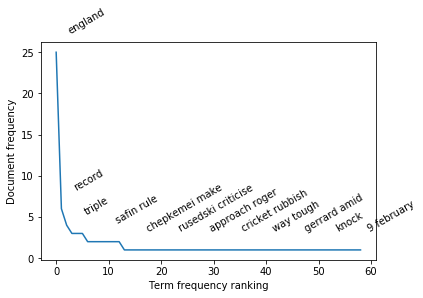

In [61]:
# visualisation of ZIPF law
def visualise_zipf(terms, itr_step = 50):
    from scipy.spatial.distance import euclidean
    from math import sqrt
    
    # --- Param ---
    # terms: collection of terms dictionary from calculate_tf_idf_terms function
    # itr_step: used to control how many terms that you want to plot. Num of terms to plot = N terms / itr_step
    
    # sort terms by its frequency
    terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True)
    
    # select a few of the terms for plotting purpose
    sel_terms = [terms[i] for i in range(0, len(terms), itr_step)]
    labels = [term['term'] for term in sel_terms]
    
    # plot term frequency ranking vs its DF
    plt.plot(range(len(sel_terms)), [x['df'] for x in sel_terms])
    plt.xlabel('Term frequency ranking')
    plt.ylabel('Document frequency')
    
    max_x = len(sel_terms)
    max_y = max([x['df'] for x in sel_terms])
    
    # annotate the points
    prev_x, prev_y = 0, 0
    for label, x, y in zip(labels,range(len(sel_terms)), [x['df'] for x in sel_terms]):
        # calculate the relative distance between labels to increase visibility
        x_dist = (abs(x - prev_x) / float(max_x)) ** 2
        y_dist = (abs(y - prev_y) / float(max_y)) ** 2
        scaled_dist = sqrt(x_dist + y_dist)
        
        if (scaled_dist > 0.1):
            plt.text(x+2, y+2, label, {'ha': 'left', 'va': 'bottom'}, rotation=30)
            prev_x, prev_y = x, y
    
    plt.show()
    
visualise_zipf(terms)

In [62]:
# another tf idf vectoriser
# limit the terms produced to terms that occured in min of 2 documents and max 80% of all documents
filter_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=2, max_df=0.8)
X_filter = filter_vec.fit_transform(df['News Stories'])

# see the number of unique tokens produced by the vectorizer. Reduced!
print(len(filter_vec.get_feature_names()))

608


In [63]:
%%time
# K means clustering using the new term vector, time it for comparison to SVD
kmeans_fil = KMeans(n_clusters=5, random_state=rs).fit(X_filter)

Wall time: 124 ms


In [64]:
# visualisation
visualise_text_cluster(kmeans_fil.n_clusters, kmeans_fil.cluster_centers_, filter_vec.get_feature_names())

Top terms for cluster 0: manager, game, arsenal, chelsea, newcastle, 
Top terms for cluster 1: australian, tennis, final, play, injury, 
Top terms for cluster 2: nation, ireland, match, rule, scotland, 
Top terms for cluster 3: england, australia, say, series, durban, 
Top terms for cluster 4: career, marathon, susan chepkemei, susan, chepkemei, 


In [65]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_trans = svd.fit_transform(X_filter)

In [66]:
# sort the components by largest weighted word
sorted_comp = svd.components_.argsort()[:, ::-1]
terms = filter_vec.get_feature_names()

# visualise word - concept/component relationships
for comp_num in range(10):
    print("Top terms in component #{}".format(comp_num), end=" ")
    for i in sorted_comp[comp_num, :5]:
        print(terms[i], end=", ")
    print()

Top terms in component #0 england, nation, say, ireland, match, 
Top terms in component #1 england, durban, series, lose, four, 
Top terms in component #2 manager, arsenal, chelsea, newcastle, manchester, 
Top terms in component #3 nation, scotland, ireland, clash, nation clash, 
Top terms in component #4 carlos moya, moya, carlos, davis, spain, 
Top terms in component #5 cricket, pakistan, australia, nation, match, 
Top terms in component #6 australian, injury, lead australian, jennifer lead, lead, 
Top terms in component #7 cricket, coach, tennis, kenteris, sprinter, 
Top terms in component #8 kenteris, sprinter, pakistan, katerina, katerina thanou, 
Top terms in component #9 game, woman, tennis, final, play, 


In [67]:
%%time
# K-means clustering using LSA-transformed X
svd_kmeans = KMeans(n_clusters=5, random_state=rs).fit(X_trans)

Wall time: 64.8 ms


In [68]:
# transform cluster centers back to original feature space for visualisation
original_space_centroids = svd.inverse_transform(svd_kmeans.cluster_centers_)

# visualisation
visualise_text_cluster(svd_kmeans.n_clusters, original_space_centroids, filter_vec.get_feature_names())

Top terms for cluster 0: england, durban, mike tindall, mike, tindall, 
Top terms for cluster 1: cricket, coach, nation, match, game, 
Top terms for cluster 2: manager, newcastle, manchester, bos, career, 
Top terms for cluster 3: australian, injury, france, henman, tim, 
Top terms for cluster 4: champion, european, series, athletics, olympic, 


# PART 4: WEB MINING

# DATA PRE-PROCESSING

In [2]:
webdata = open('Dataset/web_log_data.csv', 'r').readlines()

print('\n'.join(webdata[:3]))

ip,date_time,request,step,session,user_id

c210-49-32-6.rochd2.,18/Apr/2005:21:25:07,/,1,3,3

visp.inabox.telstra.,19/Apr/2005:08:24:28,/,1,12,12



In [3]:
import pandas as pd 

names=['IP', 'DATE & TIME', 'REQUEST', 'STEP', 'SESSION', 'USER ID']

df = pd.read_csv('Dataset/web_log_data.csv', sep=',', names=names, header=None)

In [4]:
df.head()

,IP,DATE & TIME,REQUEST,STEP,SESSION,USER ID
0,ip,date_time,request,step,session,user_id
1,c210-49-32-6.rochd2.,18/Apr/2005:21:25:07,/,1,3,3
2,visp.inabox.telstra.,19/Apr/2005:08:24:28,/,1,12,12
3,dsl-61-95-54-84.requ,19/Apr/2005:08:33:01,/,1,13,13
4,d220-236-91-52.dsl.n,19/Apr/2005:09:16:06,/,1,15,15


In [5]:
df.drop(0, inplace=True)

In [6]:
df.head()

,IP,DATE & TIME,REQUEST,STEP,SESSION,USER ID
1,c210-49-32-6.rochd2.,18/Apr/2005:21:25:07,/,1,3,3
2,visp.inabox.telstra.,19/Apr/2005:08:24:28,/,1,12,12
3,dsl-61-95-54-84.requ,19/Apr/2005:08:33:01,/,1,13,13
4,d220-236-91-52.dsl.n,19/Apr/2005:09:16:06,/,1,15,15
5,allptrs.eq.edu.au,19/Apr/2005:09:47:54,/,1,22,22


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5866 entries, 1 to 5866
Data columns (total 6 columns):
IP             5866 non-null object
DATE & TIME    5866 non-null object
REQUEST        5866 non-null object
STEP           5866 non-null object
SESSION        5866 non-null object
USER ID        5866 non-null object
dtypes: object(6)
memory usage: 320.8+ KB


In [8]:
df['IP'] = df['IP'].astype(str) 
df['DATE & TIME'] = pd.to_datetime(df['DATE & TIME'], format='%d/%b/%Y:%H:%M:%S')
df['REQUEST'] = df['REQUEST'].astype(str) 
df['STEP'] = df['STEP'].astype(int)
df['SESSION'] = df['SESSION'].astype(int)
df['USER ID'] = df['USER ID'].astype(int)

mask = (df['REQUEST'].str.endswith('.css') | df['REQUEST'].str.endswith('.js') | df['REQUEST'].str.endswith('.ico'))
print("Number of rows before removing: ", len(df))
df = df[~mask]
print("Number of rows after removing: ", len(df))

# df = pd.get_dummies(df)

Number of rows before removing:  5866
Number of rows after removing:  4853


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4853 entries, 1 to 5866
Data columns (total 6 columns):
IP             4853 non-null object
DATE & TIME    4853 non-null datetime64[ns]
REQUEST        4853 non-null object
STEP           4853 non-null int32
SESSION        4853 non-null int32
USER ID        4853 non-null int32
dtypes: datetime64[ns](1), int32(3), object(2)
memory usage: 208.5+ KB


# ASSOCIATION RULE MINING - START

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4853 entries, 1 to 5866
Data columns (total 6 columns):
IP             4853 non-null object
DATE & TIME    4853 non-null datetime64[ns]
REQUEST        4853 non-null object
STEP           4853 non-null int32
SESSION        4853 non-null int32
USER ID        4853 non-null int32
dtypes: datetime64[ns](1), int32(3), object(2)
memory usage: 208.5+ KB
None


In [11]:
transactions = df.groupby(['USER ID'])['REQUEST'].apply(list)

print(transactions.head(5))

USER ID
1                                       [/robots.txt]
2                       [/code/Global/code/menu.html]
3    [/, /guarantee.html, /more.html, /services.html]
4                                       [/robots.txt]
5                          [/code/Ultra/services.htm]
Name: REQUEST, dtype: object


In [12]:
from apyori import apriori

transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.05))

print(results[:5])

[RelationRecord(items=frozenset({'/'}), support=0.3789858860428646, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'/'}), confidence=0.3789858860428646, lift=1.0)]), RelationRecord(items=frozenset({'/eaglefarm/'}), support=0.1322530057501307, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'/eaglefarm/'}), confidence=0.1322530057501307, lift=1.0)]), RelationRecord(items=frozenset({'/eaglefarm/pdf/Web_Price_List.pdf'}), support=0.08416100365917407, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'/eaglefarm/pdf/Web_Price_List.pdf'}), confidence=0.08416100365917407, lift=1.0)]), RelationRecord(items=frozenset({'/eaglefarm/pricelist'}), support=0.0930475692629378, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'/eaglefarm/pricelist'}), confidence=0.0930475692629378, lift=1.0)]), RelationRecord(items=frozenset({'/eaglefarm/pricelist/'}), support=0.090433

In [13]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics: 
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift])
            
    return pd.DataFrame(rules, columns=['Left Side', 'Right Side', 'Support', 'Confidence', 'Lift'])

result_df = convert_apriori_results_to_pandas_df(results)

print(result_df.head(20))

                            Left Side                         Right Side  \
0                                                                      /   
1                                                            /eaglefarm/   
2                                      /eaglefarm/pdf/Web_Price_List.pdf   
3                                                   /eaglefarm/pricelist   
4                                                  /eaglefarm/pricelist/   
5                                                   /eaglefarm/specials/   
6                                                             /more.html   
7                                                            /robots.txt   
8                                                         /services.html   
9                                   /                         /more.html   
10                         /more.html                                  /   
11                                  /                     /services.html   
12          

In [14]:
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(10))

                                            Left Side             Right Side  \
33                   /eaglefarm/pricelist,/eaglefarm/  /eaglefarm/pricelist/   
39  /eaglefarm/pdf/Web_Price_List.pdf,/eaglefarm/p...  /eaglefarm/pricelist/   
30      /eaglefarm/pdf/Web_Price_List.pdf,/eaglefarm/  /eaglefarm/pricelist/   
36  /eaglefarm/pdf/Web_Price_List.pdf,/eaglefarm/p...  /eaglefarm/pricelist/   
40  /eaglefarm/pdf/Web_Price_List.pdf,/eaglefarm/,...   /eaglefarm/pricelist   
27      /eaglefarm/pdf/Web_Price_List.pdf,/eaglefarm/   /eaglefarm/pricelist   
34                  /eaglefarm/,/eaglefarm/pricelist/   /eaglefarm/pricelist   
37  /eaglefarm/pdf/Web_Price_List.pdf,/eaglefarm/p...   /eaglefarm/pricelist   
23                               /eaglefarm/pricelist  /eaglefarm/pricelist/   
24                              /eaglefarm/pricelist/   /eaglefarm/pricelist   

     Support  Confidence       Lift  
33  0.075274    1.000000  11.057803  
39  0.065865    1.000000  11.057803  
30  0

# ASSOCIATION RULE MINING - END

# CLUSTERING - START

In [15]:
from sklearn.preprocessing import StandardScaler

df2 = df[['SESSION','USER ID','STEP']]

X = df2.as_matrix()

scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
from sklearn.cluster import KMeans

rs = 42

model = KMeans(n_clusters = 3, random_state=rs) 
model.fit(X)

print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 5091.691854740058
Centroid locations:
[-0.86197557 -0.86197557 -0.17477157]
[ 0.85417886  0.85417886 -0.22538647]
[0.18781388 0.18781388 2.84942859]


In [17]:
model = KMeans(n_clusters = 8, random_state=rs) 
model.fit(X)

print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 1654.0554242232702
Centroid locations:
[-1.37250092 -1.37250092 -0.33125034]
[ 0.44985737  0.44985737 -0.39607929]
[0.20927354 0.20927354 0.82580183]
[ 1.30371491  1.30371491 -0.26101412]
[1.59019654 1.59019654 7.56557945]
[0.89832471 0.89832471 2.65669671]
[-0.4553753  -0.4553753  -0.32476559]
[-1.12728984 -1.12728984  1.87760112]


In [18]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters = 3)
agg_model.fit(X[:50])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [19]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

def plot_dendrogram(model, **kwargs):
    children = model.children_
    
    distance = np.arange(children.shape[0])
    
    no_of_observations = np.arange(2, children.shape[0]+2)
    
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

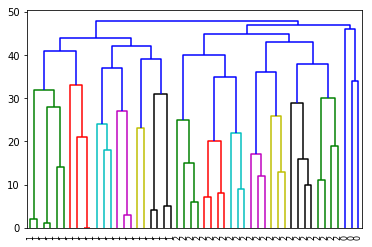

In [20]:
plot_dendrogram(agg_model, labels=agg_model.labels_)
plt.show()

C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Cluster membership
0    2292
1    2243
2     318
Name: Cluster ID, dtype: int64


C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value 

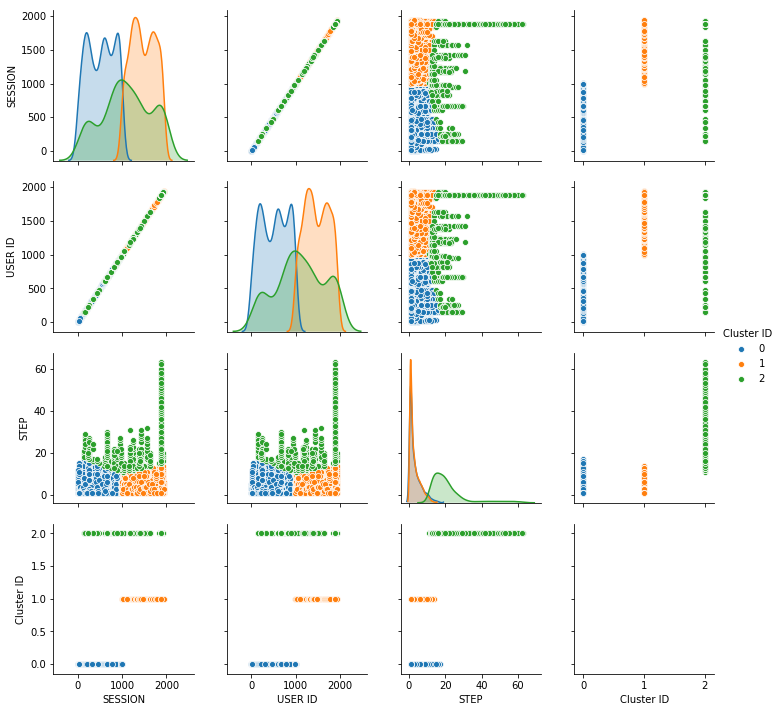

In [21]:
import seaborn as sns

model = KMeans(n_clusters = 3, random_state=rs).fit(X)

y = model.predict(X)
df2['Cluster ID'] = y

print("Cluster membership")
print(df2['Cluster ID'].value_counts())

cluster_g = sns.pairplot(df2, hue='Cluster ID')
plt.show()

C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Cluster membership
6    1076
3    1041
1     982
0     947
2     423
7     227
5     130
4      27
Name: Cluster ID, dtype: int64


C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value 

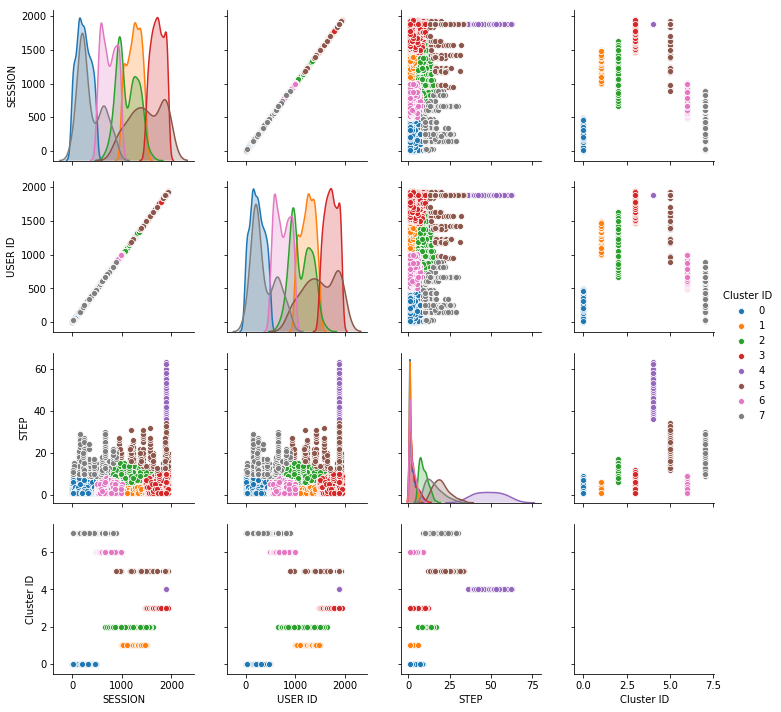

In [22]:
model = KMeans(n_clusters = 8, random_state=rs).fit(X)

y = model.predict(X)
df2['Cluster ID'] = y

print("Cluster membership")
print(df2['Cluster ID'].value_counts())

cluster_g = sns.pairplot(df2, hue='Cluster ID')
plt.show()

Distribution for cluster 0


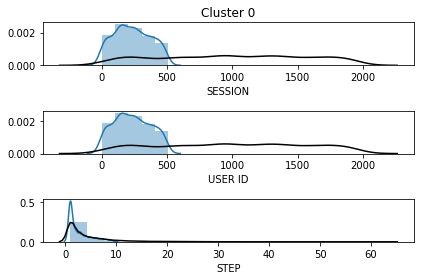

Distribution for cluster 1


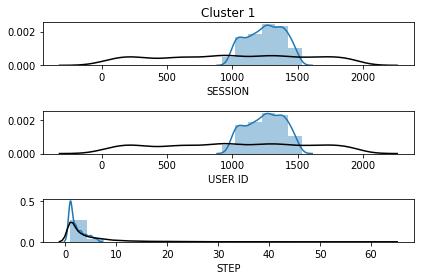

In [23]:
cols = ['SESSION','USER ID','STEP']
n_bins = 20

clusters_to_inspect = [0,1]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    fig, ax = plt.subplots(nrows=3)
    ax[0].set_title("Cluster {}".format(cluster))
    
    for j, col in enumerate(cols):
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        sns.distplot(df2[df2['Cluster ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")
        
    plt.tight_layout()
    plt.show()

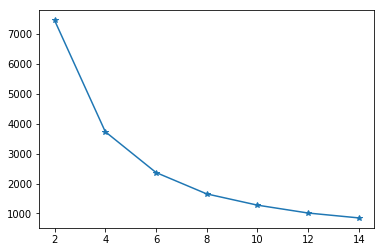

In [24]:
clusters = []
inertia_vals = []

for k in range(2, 15, 2):
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    clusters.append(model)
    inertia_vals.append(model.inertia_)
    
plt.plot(range(2, 15, 2), inertia_vals, marker='*')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=4 0.43124365018722843
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=6 0.45476919883048494


Sum of intra-cluster distance: 3732.433391548298
Centroid locations:
[ 0.02463826  0.02463826 -0.18984053]
[ 1.13982906  1.13982906 -0.21213871]
[0.23056866 0.23056866 2.98662039]
[-1.18204833 -1.18204833 -0.16169752]
Cluster membership
0    1573
3    1514
1    1479
2     287
Name: Cluster ID, dtype: int64


C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\n10421190\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid v

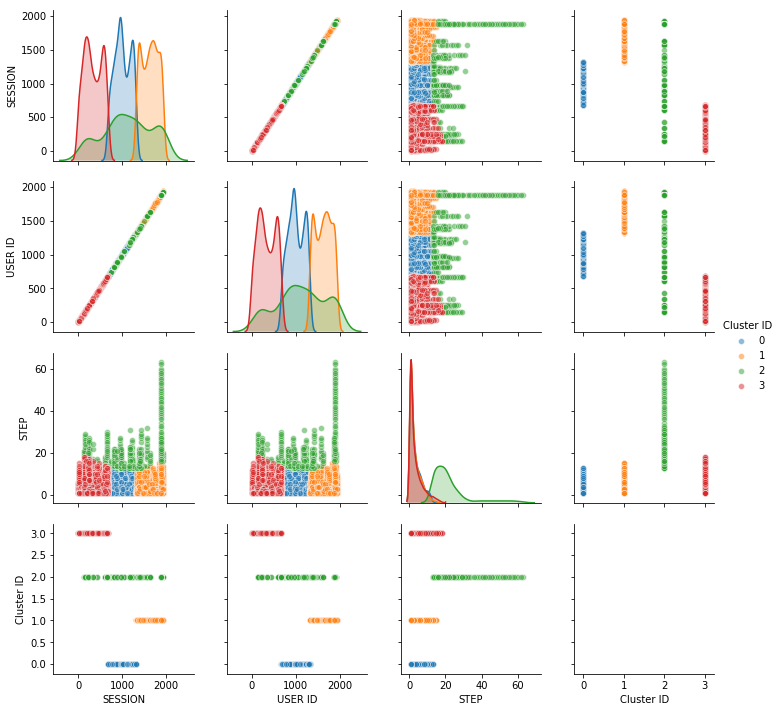

In [26]:
model = KMeans(n_clusters = 4, random_state = rs) 
model.fit(X)

print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)
    
y= model.predict(X)
df2['Cluster ID'] = y

print("Cluster membership")
print(df2['Cluster ID'].value_counts())

cluster_g = sns.pairplot(df2, hue='Cluster ID', plot_kws={'alpha' : 0.5})
plt.show()

# CLUSTERING - END